## A Microeconomics (and fantasynomics) Notebook

This notebook will gradually introduce microeconomics graphs and theories with increasing complexity and use own concepts. The goal is to use the custom complex models in own game where economics play a part.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import math
import bisect

### Definitions
---

##### Homo economicus

##### Normative theory

##### Positive theory

##### Utility

##### Indifference curve

##### Normal good

##### Inferior good

##### Giffen good

##### Substitute

##### Complement

##### Supply

##### Demand

##### Cost

##### Marginal Cost

##### Average Cost

##### Returns to scale

##### Economy of scale

##### Perfect competition

##### Price taker

### 1 Supply
---

#### 1.1 Simple supply of one producer

The supply depends on marginal costs. The supply then follows the cost function.

##### 1.1.1 Example with linear marginal costs



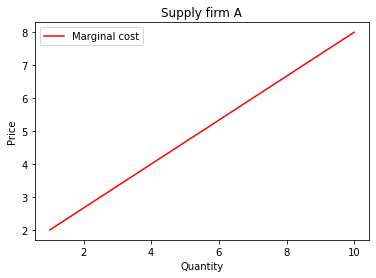

array([[ 1.        ,  2.        ],
       [ 2.        ,  2.66666667],
       [ 3.        ,  3.33333333],
       [ 4.        ,  4.        ],
       [ 5.        ,  4.66666667],
       [ 6.        ,  5.33333333],
       [ 7.        ,  6.        ],
       [ 8.        ,  6.66666667],
       [ 9.        ,  7.33333333],
       [10.        ,  8.        ]])

In [37]:
#config

def linear_marginal_cost_firm(low_price,high_price,max_quantity,plot=False):
    """
    params: int
    returns: a matrix with col[0] of units and col[1] of marginal cost of the unit, able to plot the marginal cost graph
    """
    unit = np.arange(max_quantity) + 1
    marginal_cost = np.linspace(low_price,high_price,max_quantity)

    if plot:
        plt.title("Supply firm A")
        plt.xlabel("Quantity")
        plt.ylabel("Price")
        plt.plot(unit, marginal_cost, color ="red", label='Marginal cost')
        plt.legend()
        plt.show()
    
    return np.vstack((unit, marginal_cost)).T
    
linear_marginal_cost_firm(2,8,10,plot=True)

We can find the quantity or the price the firm is willing to produce at if we know the other. We can also get the supplier surplus.

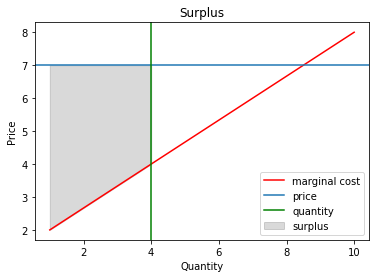

16.0
(5.333333333333333, 10.0)
(3, 1.3333333333333335)


In [44]:
def get_surplus(quantity, price, marginal_cost, plot=False):
    """
    params: int
    returns the surplus of the company given a quantity and price
    """
    surplus = 0
    #calculates the surplus for each unit up to the quantity given and takes the sum of all surplusses
    costs = marginal_cost[:quantity]
    surplus = (price - costs).sum()
    
    if plot:
        unit = np.arange(len(marginal_cost)) + 1
        
        low_price = marginal_cost[0]
        high_price = marginal_cost[-1]
        
        plt.title("Surplus")
        plt.xlabel("Quantity")
        plt.ylabel("Price")
        plt.plot(unit, marginal_cost, color ="red", label='marginal cost')
        plt.axhline(y = price, label='price')
        plt.axvline(x = quantity, color="green", label='quantity')
        plt.fill_between(
            [1,quantity],
            [low_price,marginal_cost[quantity-1]],
            [price,price],color='black',alpha=0.15,label='surplus')
        plt.legend()
        plt.show()
    
    return surplus

def get_price(quantity, marginal_cost):
    """
    params: int
    returns the price the company is willing to sell at for a given quantity and the surplus that is made at that price
    """
    max_quantity = len(marginal_cost)
    #if within marked range then give out the price and surplus else return 'nan'
    if (0 < quantity < max_quantity):
        price = marginal_cost[quantity]
        return price, get_surplus(quantity, price, marginal_cost)
    else:
        return np.nan

def get_quantity(price, marginal_cost):
    """
    params: int
    returns the quantity the company is willing to sell at a given price and the surplus that is made at that quantity
    """
    low_price = marginal_cost[0]
    high_price = marginal_cost[-1]
    #if over high_price then return max quantity, else if under min price return 0, else return 
    if (price >= high_price):
        return max_quantity
    elif (price < low_price):
        return 0
    else:
        #finds closest number under or equals to price in marginal_cost
        #[0] is array of elements matching and -1 is last (highest) elem
        #+ 1 because 0 indexed
        quantity = np.where(marginal_cost <= price)[0][-1] + 1
        return price, get_surplus(quantity, price, marginal_cost)


mc = linear_marginal_cost_firm(2,8,10)[:,1]
print(get_surplus(4,7,mc,plot=True))
print(get_price(5,mc))
print(get_quantity(3,mc))

### 2 Demand

### 3 Cost